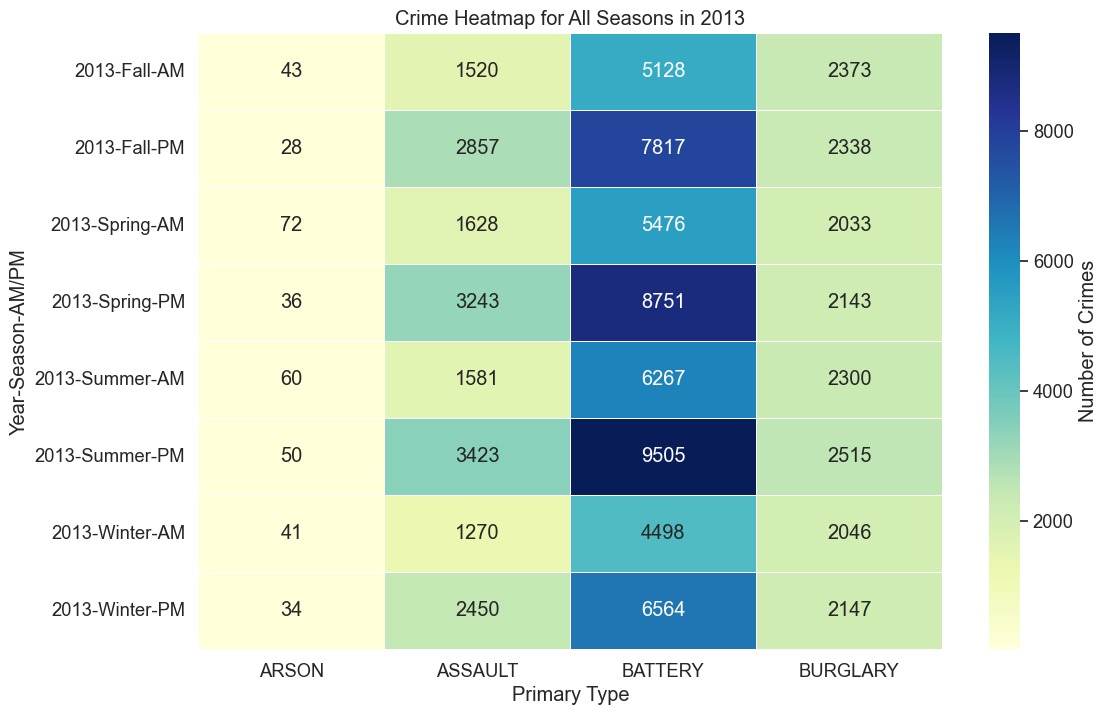

In [3]:
#This code is meant to dig deeper and find more specific information per years.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('endingData.csv')  # Replace 'your_data.csv' with the actual CSV file path.

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['AM/PM'] = data['Date'].dt.strftime('%p')

# Define a function to categorize months into seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

data['Season'] = data['Month'].apply(get_season)

# Group and aggregate the data with 'Primary Type' as a multi-index level
agg_data = data.groupby(['Year', 'Season', 'AM/PM', 'Primary Type']).size().unstack(fill_value=0)

# Create a heatmap for a specific year (e.g., 2020)
selected_year = 2013

# Filter the data for the selected year
filtered_data = agg_data.loc[agg_data.index.get_level_values('Year') == selected_year]

# Create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))

sns.heatmap(filtered_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Crimes'})

plt.title(f'Crime Heatmap for All Seasons in {selected_year}')
plt.savefig("CrimeHeatmap2013Example")
plt.show()
